<a href="https://colab.research.google.com/github/KshiteejB/KshiteejB.github.io/blob/main/datafileAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [ ]:
#1

# Load the dataset
data = pd.read_csv('/content/reduced_data_file.csv')

# Display the first few rows of the dataset to see its structure
print(data.head())


                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2                  0               

In [ ]:
#2
# summary of the dataframe
print(data.info())

# Checking missing values
print(data.isnull().sum())

# Get a statistical overview of the numeric data
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            10000 non-null  object
 1   md5Hash             10000 non-null  object
 2   Machine             10000 non-null  int64 
 3   DebugSize           10000 non-null  int64 
 4   DebugRVA            10000 non-null  int64 
 5   MajorImageVersion   10000 non-null  int64 
 6   MajorOSVersion      10000 non-null  int64 
 7   ExportRVA           10000 non-null  int64 
 8   ExportSize          10000 non-null  int64 
 9   IatVRA              10000 non-null  int64 
 10  MajorLinkerVersion  10000 non-null  int64 
 11  MinorLinkerVersion  10000 non-null  int64 
 12  NumberOfSections    10000 non-null  int64 
 13  SizeOfStackReserve  10000 non-null  int64 
 14  DllCharacteristics  10000 non-null  int64 
 15  ResourceSize        10000 non-null  int64 
 16  BitcoinAddresses    100

In [ ]:
#3
# Numeric columns
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Categorical columns
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)


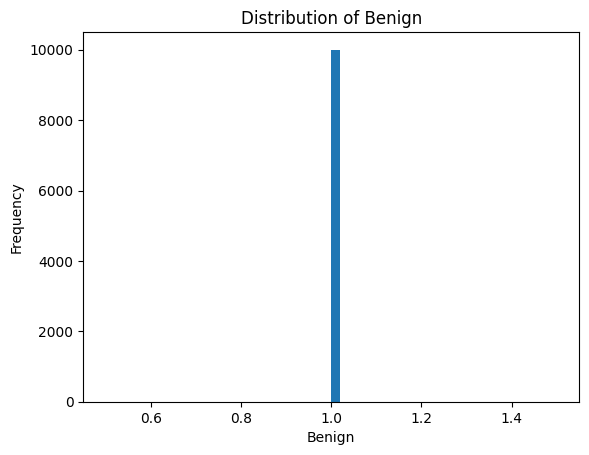

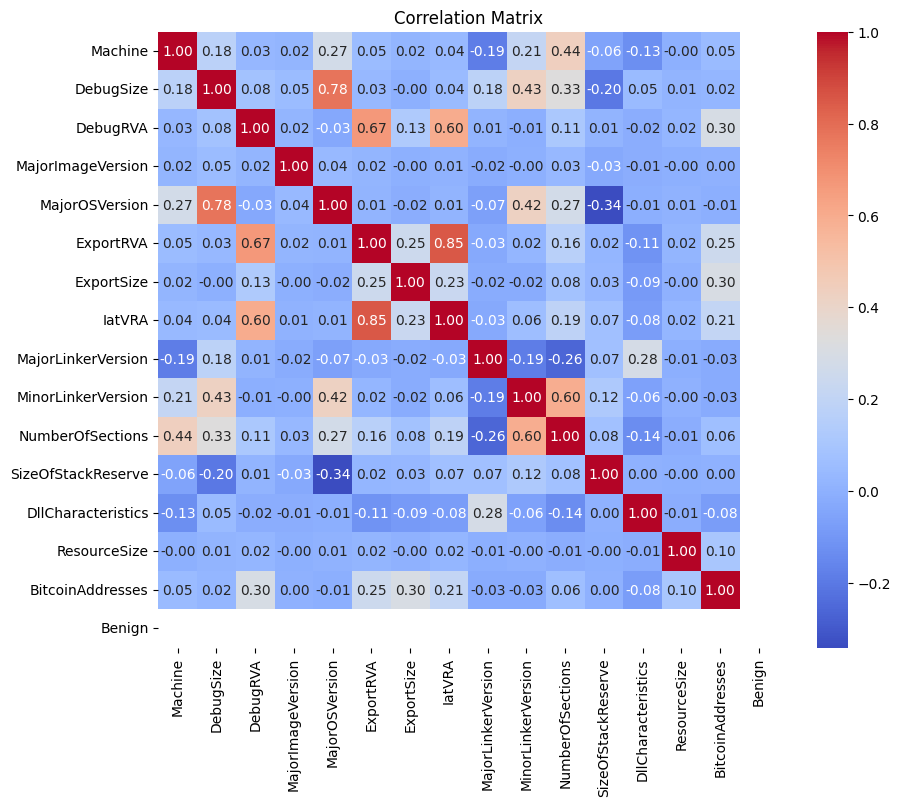

In [ ]:
#4
#load the file
data = pd.read_csv('/content/reduced_data_file.csv')

numeric_cols = data.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

if 'Benign' in data.columns:
    # Histogram of the correct numeric feature
    plt.hist(data['Benign'], bins=50)
    plt.title('Distribution of Benign')
    plt.xlabel('Benign')
    plt.ylabel('Frequency')
    plt.show()

    # Correlation matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("The column 'amount' does not exist in the dataset. Please check the column names listed above.")



In [ ]:
#5

numeric_data = data.select_dtypes(include=[np.number])
grouped_data = numeric_data.groupby(data['Benign']).mean()
print(grouped_data)



           Machine  DebugSize     DebugRVA  MajorImageVersion  MajorOSVersion  \
Benign                                                                          
1       15815.6496    46.6788  386556.0587           109.4302          6.5396   

          ExportRVA  ExportSize       IatVRA  MajorLinkerVersion  \
Benign                                                             
1       410129.2744   4728.3076  339938.1456             13.6543   

        MinorLinkerVersion  NumberOfSections  SizeOfStackReserve  \
Benign                                                             
1                   4.8435            4.9505         739892.5792   

        DllCharacteristics  ResourceSize  BitcoinAddresses  Benign  
Benign                                                              
1               18911.7024   153339.9351            0.0252     1.0  


In [ ]:
#6

# Encoding categorical variables
data = pd.get_dummies(data)

# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('Benign', axis=1))

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['Benign'], test_size=0.2, random_state=42)




In [ ]:
#reduced to rows

# Load the dataset
data = pd.read_csv('/content/data_file.csv')

# Keep only the first 10,000 rows
data = data.iloc[:10000]

# Save the reduced dataset to a new CSV file
data.to_csv('/content/reduced_data_file.csv', index=False)


In [ ]:
#7#
data.to_csv('/content/processed_data_file.csv', index=False)



In [ ]:

# Load the dataset
data = pd.read_csv('/content/data_file.csv')

# Display the first few rows to understand the structure
print("Initial data preview:")
print(data.head())

# Basic Data Assessment
print("\nData Info:")
data.info()

# Check for any missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Remove duplicate rows to ensure data quality
print("\nDuplicates before removal:", data.duplicated().sum())
data.drop_duplicates(inplace=True)
print("Duplicates after removal:", data.duplicated().sum())

data.to_csv('/content/cleaned_data_file.csv', index=False)

# Print the cleaned data preview
print("\nCleaned data preview:")
print(data.head())


Initial data preview:
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2            

<ipython-input-65-6b5d53b47cc5>:19: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:



Duplicates before removal: 0
Duplicates after removal: 0

Cleaned data preview:
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10     

In [ ]:
#cleaning pre procc
# Load the dataset
data = pd.read_csv('/content/data_file.csv')

# Display the initial data structure
print("Initial data preview:")
print(data.head())
print(data.info())

# Check for any missing values in the dataset
print("\nMissing values per column before cleaning:")
print(data.isnull().sum())

# Handling missing values more comprehensively
for column in data.columns:
    if data[column].dtype == np.number or data[column].dtype == np.float64:
        # If the column is numeric, replace NaNs with the median, and consider zeros as NaNs if applicable
        if (data[column] == 0).any():
            data[column] = data[column].replace(0, np.NaN)
        data[column].fillna(data[column].median(), inplace=True)
    else:
        # If the column is categorical, replace NaNs with the mode
        data[column].fillna(data[column].mode()[0], inplace=True)

# Remove duplicate rows to ensure data quality
data.drop_duplicates(inplace=True)

not_required_values = ['unwanted_value1', 'unwanted_value2']
data.replace(not_required_values, np.nan, inplace=True)
data.dropna(inplace=True)

# Normalize numerical data if required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Save the cleaned data to a new CSV file
data.to_csv('/content/cleaned_data_file.csv1', index=False)

# Final check for nulls and data preview
print("\nMissing values per column after cleaning:")
print(data.isnull().sum())
print("\nCleaned data preview:")
print(data.head())


Initial data preview:
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2            

<ipython-input-66-8b8f3f1f8150>:16: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number or data[column].dtype == np.float64:



Missing values per column after cleaning:
FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

Cleaned data preview:
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash   Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1 -0.481400  -0.004004 -0.081004   
1  95e19f365

Initial data preview:
                                            FileName  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll   
1       05c8318f98a5d301d80000009c316005.vertdll.dll   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll   
3        075822ac99a5d301660400009c316005.adhapi.dll   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...   

                            md5Hash  Machine  DebugSize  DebugRVA  \
0  79755c51e413ed3c6be4635fd729a6e1      332          0         0   
1  95e19f3657d34a432eada93221b0ea16    34404         84    121728   
2  85c32641d77a54e19ba8ea4ab305c791      332          0         0   
3  62e3b959d982ef534b66f819fe15f085    34404         84     19904   
4  ae38c5f7d313ad0ff3bfb8826476767f    34404         84     97728   

   MajorImageVersion  MajorOSVersion  ExportRVA  ExportSize  IatVRA  \
0                  0               4          0           0    8192   
1                 10              10     126576        4930       0   
2            

<ipython-input-67-2b6d11b97146>:19: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number or data[column].dtype == np.float64:


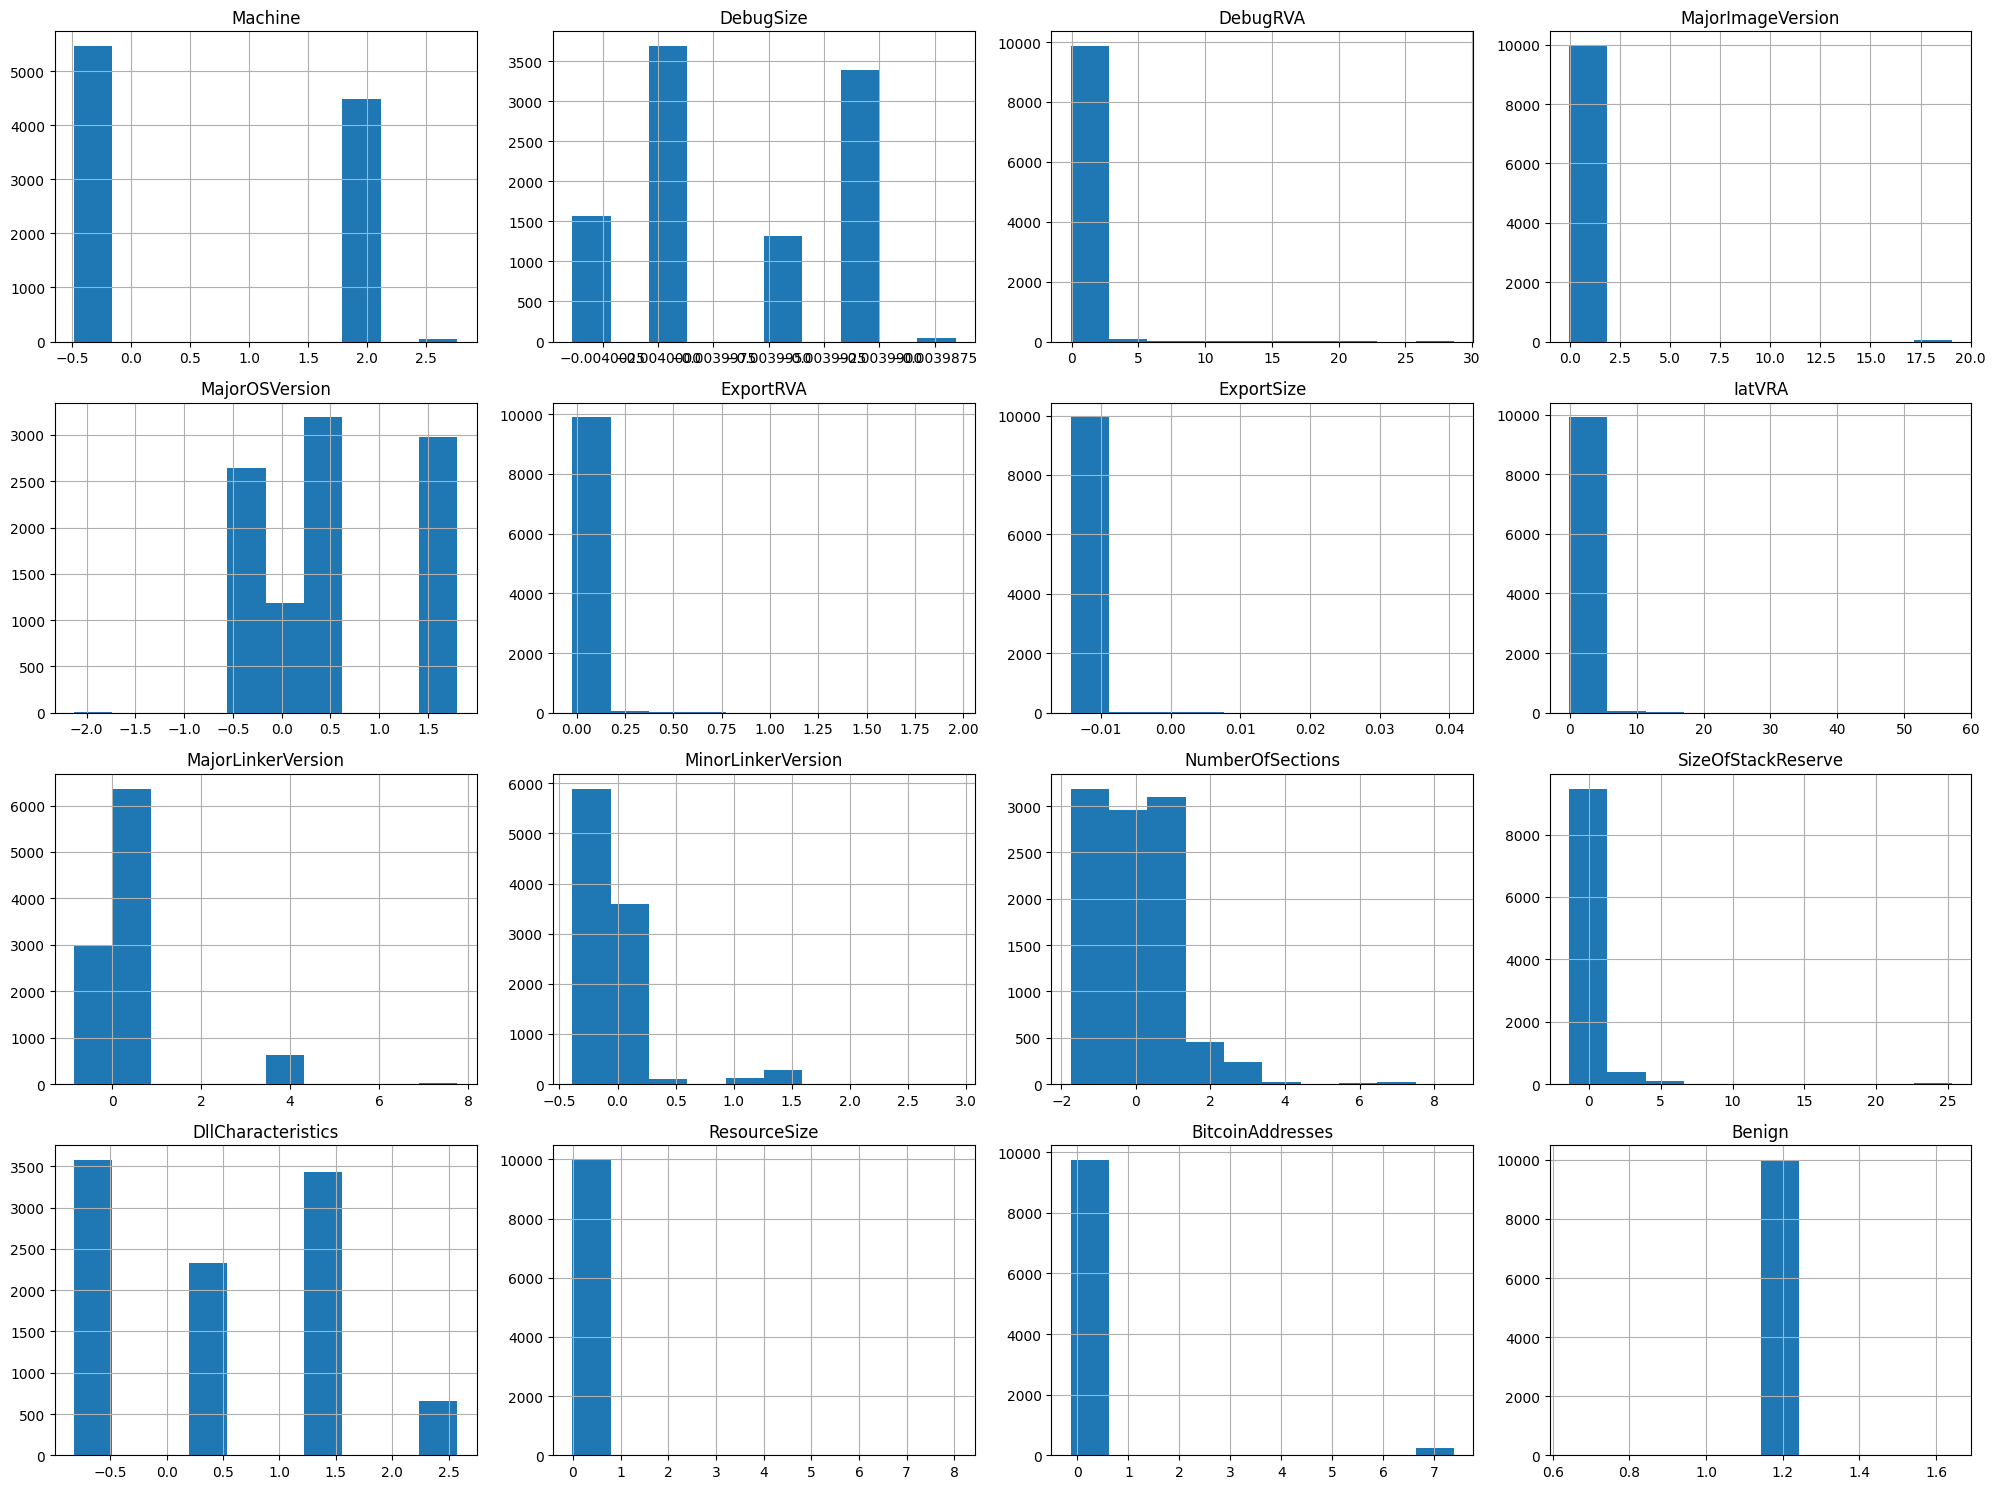

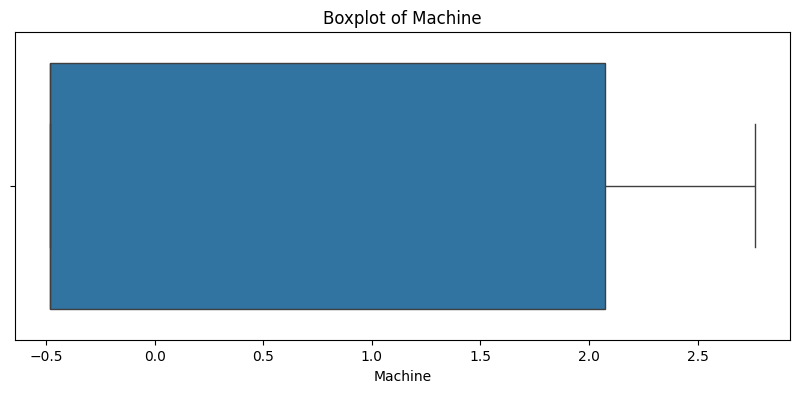

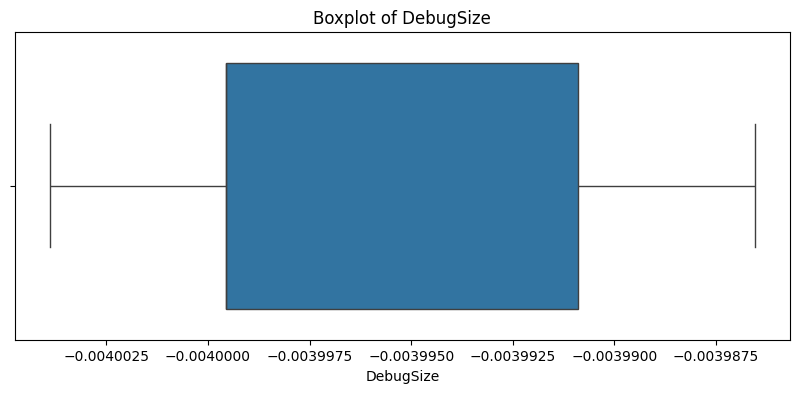

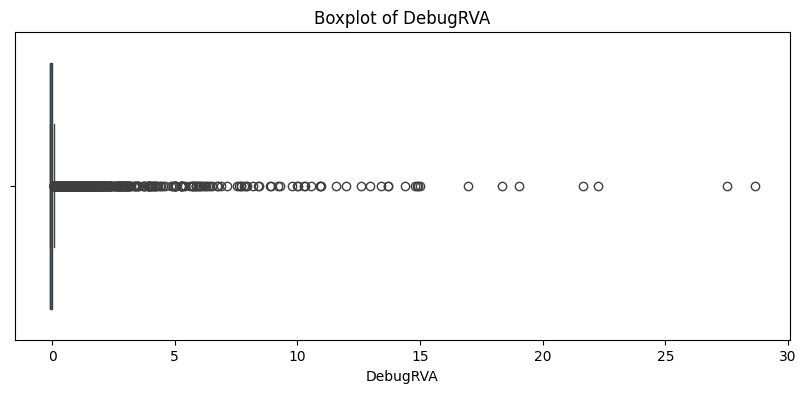

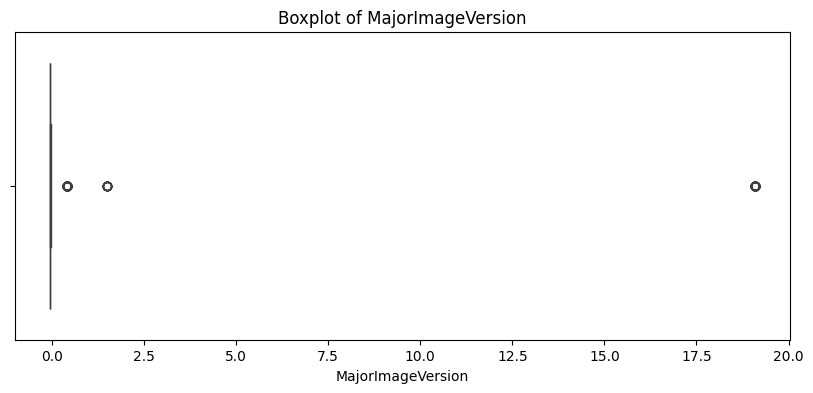

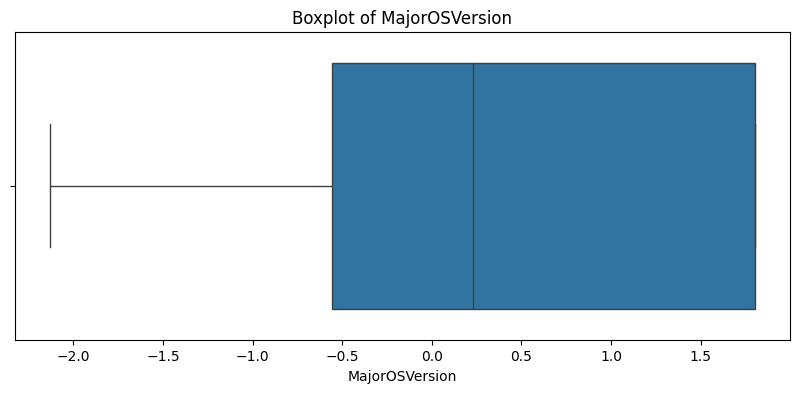

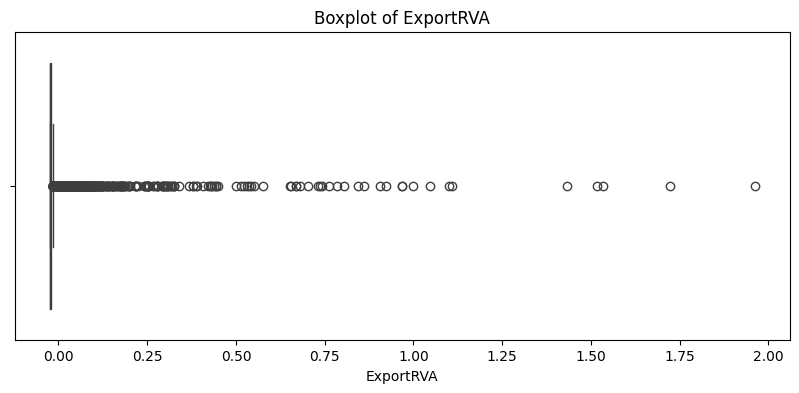

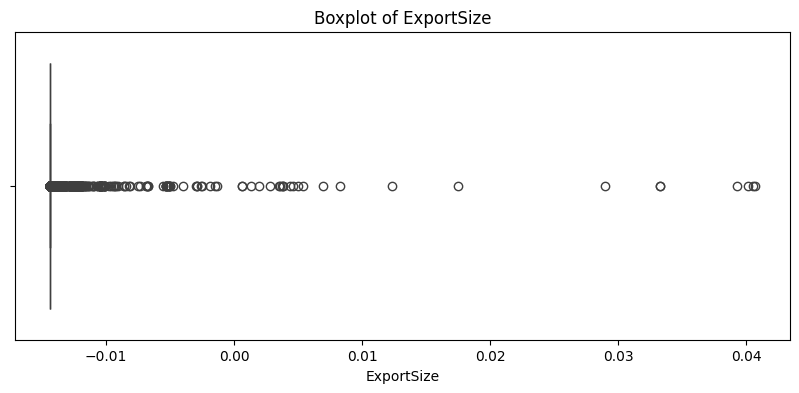

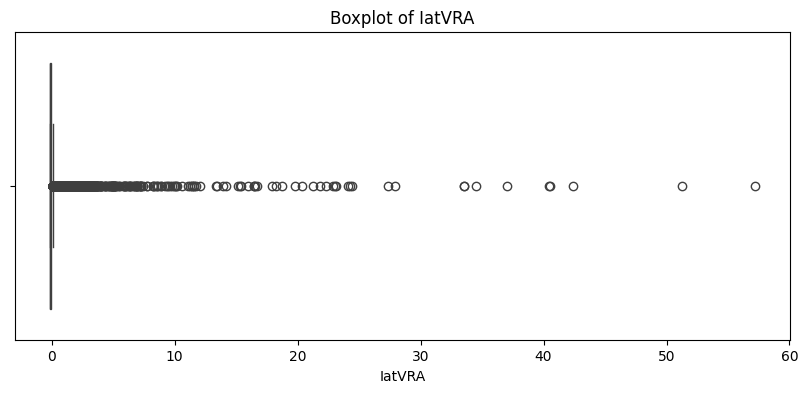

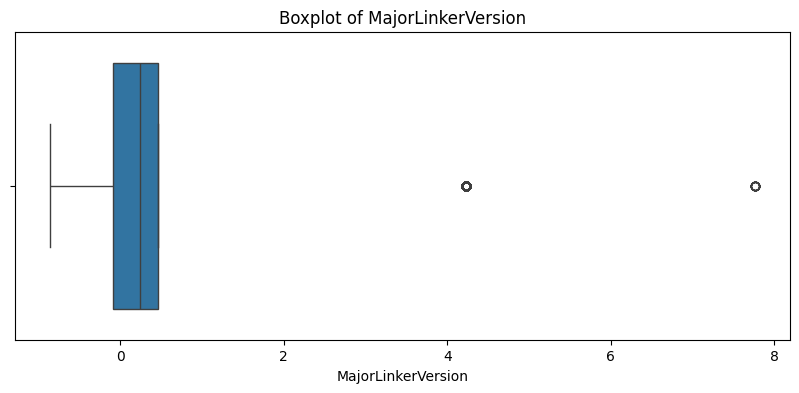

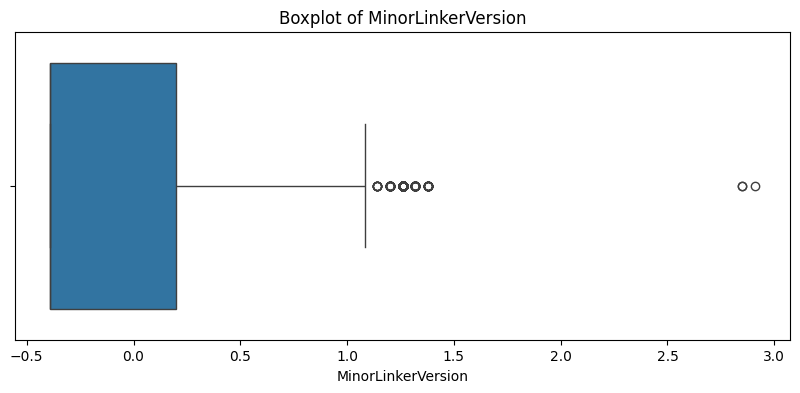

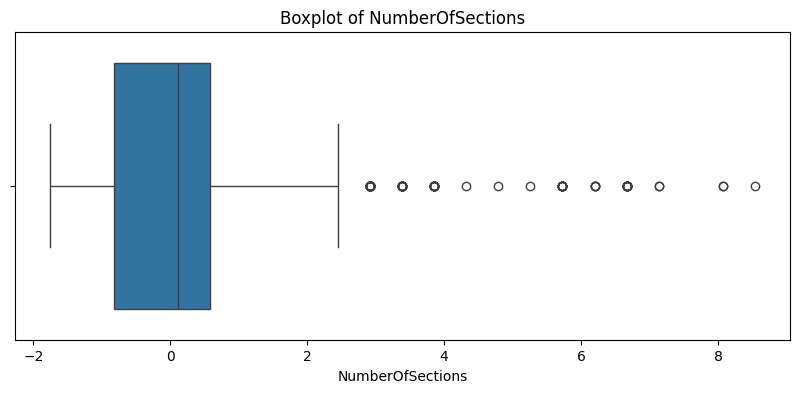

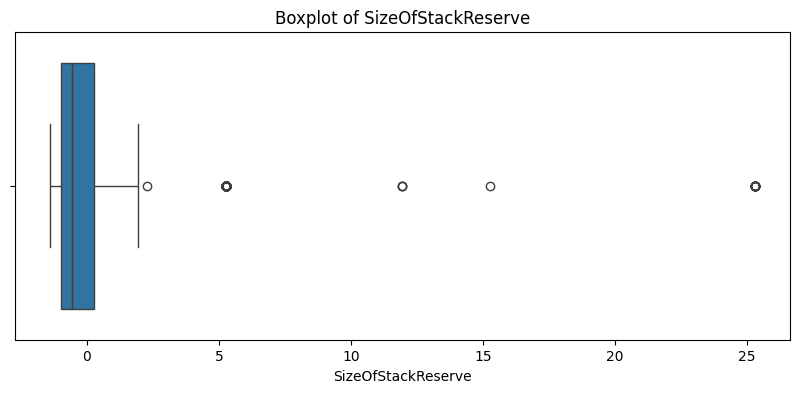

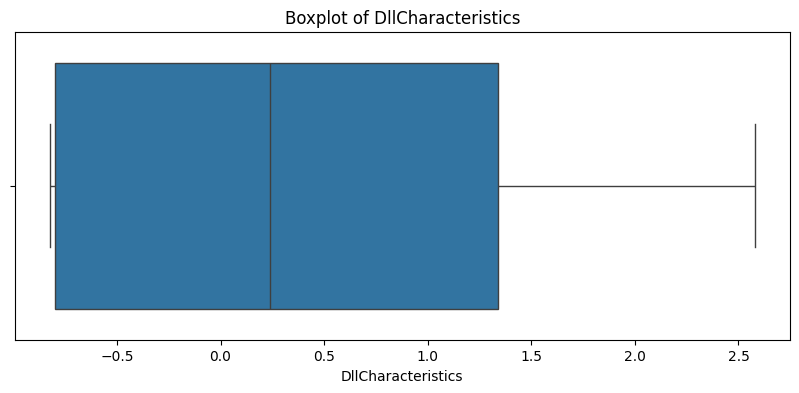

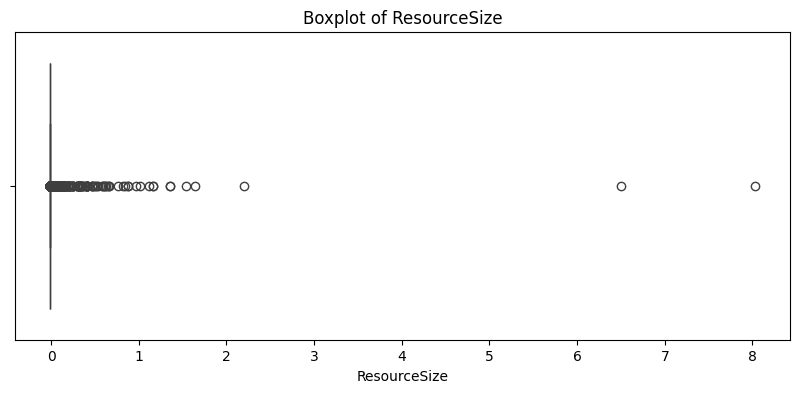

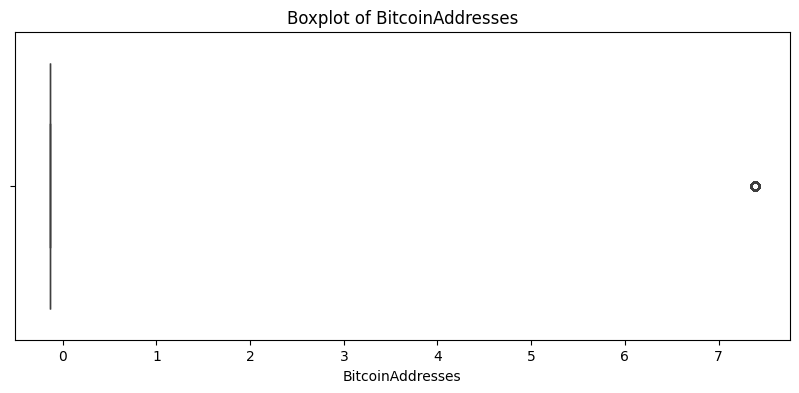

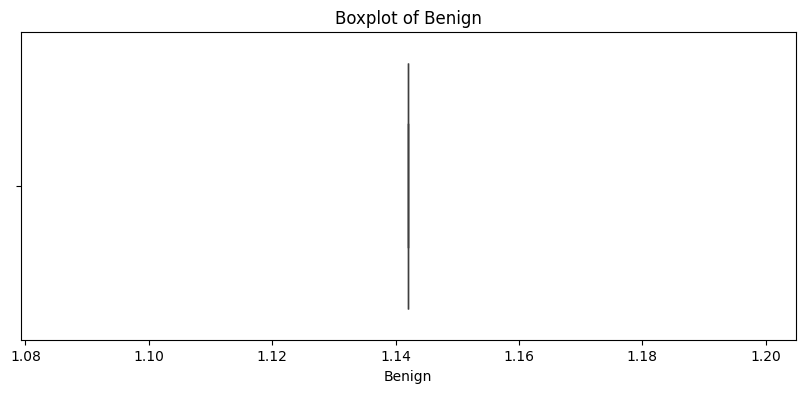

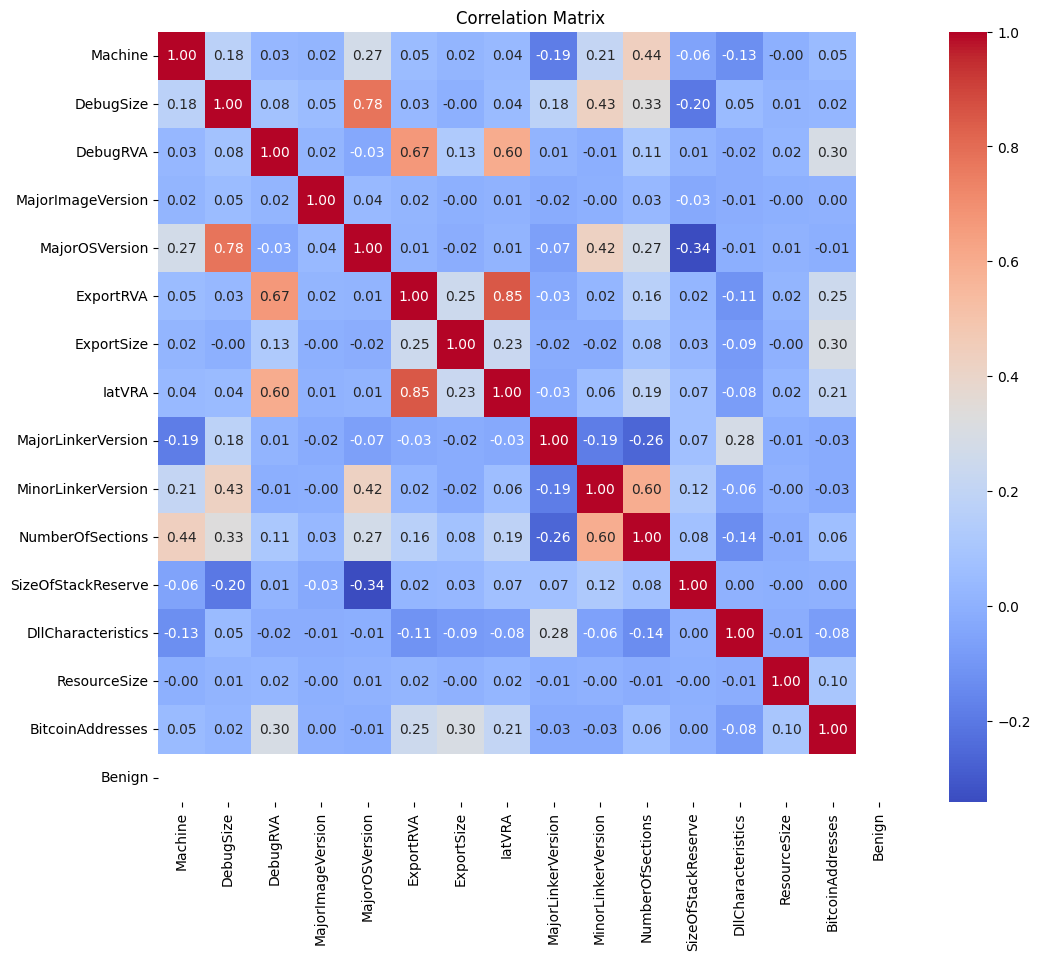

In [ ]:
#visualization types

# Step 1: Load the dataset
data = pd.read_csv('/content/data_file.csv')

# Step 2: Data Cleaning
print("Initial data preview:")
print(data.head())
print(data.info())

# Check for any missing values in the dataset
print("\nMissing values per column before cleaning:")
print(data.isnull().sum())

# Handling missing values more comprehensively
for column in data.columns:
    if data[column].dtype == np.number or data[column].dtype == np.float64:
        # If the column is numeric, replace NaNs with the median
        data[column].fillna(data[column].median(), inplace=True)
    else:
        # If the column is categorical, replace NaNs with the mode
        data[column].fillna(data[column].mode()[0], inplace=True)

# Remove duplicate rows to ensure data quality
data.drop_duplicates(inplace=True)

# Remove unwanted values such as non-numeric 'Benign' column entries
data = data[data['Benign'].apply(lambda x: str(x).isdigit())]

# Normalize numerical data if required
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Keep only the first 10,000 rows
data = data.iloc[:10000]

# Save the reduced and cleaned dataset
data.to_csv('/content/reduced_cleaned_data_file.csv', index=False)

# Step 3: Data Visualization
# Histograms for numeric features
data.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

# Boxplots for numeric features to check for outliers
for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Display the data types of each column
print(data.dtypes)


FileName               object
md5Hash                object
Machine               float64
DebugSize             float64
DebugRVA              float64
MajorImageVersion     float64
MajorOSVersion        float64
ExportRVA             float64
ExportSize            float64
IatVRA                float64
MajorLinkerVersion    float64
MinorLinkerVersion    float64
NumberOfSections      float64
SizeOfStackReserve    float64
DllCharacteristics    float64
ResourceSize          float64
BitcoinAddresses      float64
Benign                float64
dtype: object


In [ ]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns
print("Numerical Columns:")
print(numerical_cols)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion',
       'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections',
       'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
       'BitcoinAddresses', 'Benign'],
      dtype='object')
Categorical Columns:
Index(['FileName', 'md5Hash'], dtype='object')


In [ ]:
# Label Encoding
data['FileName_encoded'] = data['FileName'].astype('category').cat.codes
data['md5Hash_encoded'] = data['md5Hash'].astype('category').cat.codes

# Display the DataFrame to verify
print(data[['FileName', 'FileName_encoded', 'md5Hash', 'md5Hash_encoded']].head())

                                            FileName  FileName_encoded  \
0           0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll                 0   
1       05c8318f98a5d301d80000009c316005.vertdll.dll                 1   
2           06054fba-5619-4a86-a861-ffb0464bef5d.dll                 2   
3        075822ac99a5d301660400009c316005.adhapi.dll                 3   
4  090607dd9ba5d301ca0900009c316005.SensorsNative...                 4   

                            md5Hash  md5Hash_encoded  
0  79755c51e413ed3c6be4635fd729a6e1             4767  
1  95e19f3657d34a432eada93221b0ea16             5912  
2  85c32641d77a54e19ba8ea4ab305c791             5263  
3  62e3b959d982ef534b66f819fe15f085             3841  
4  ae38c5f7d313ad0ff3bfb8826476767f             6833  


In [ ]:
#all numerical values got stored in one -data numerical
all_numerical_cols = data.select_dtypes(include=['number']).columns
print("All Numerical Columns Including Encoded:")
print(all_numerical_cols)

# Create a new DataFrame with all numerical columns
data_numerical = data[all_numerical_cols]

# Display the new DataFrame to verify
print(data_numerical.head())

All Numerical Columns Including Encoded:
Index(['Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion',
       'MajorOSVersion', 'ExportRVA', 'ExportSize', 'IatVRA',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections',
       'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize',
       'BitcoinAddresses', 'Benign', 'FileName_encoded', 'md5Hash_encoded'],
      dtype='object')
    Machine  DebugSize  DebugRVA  MajorImageVersion  MajorOSVersion  \
0 -0.481400  -0.004004 -0.081004          -0.052767       -0.557274   
1  2.071691  -0.003991 -0.017042          -0.043791        1.801516   
2 -0.481400  -0.004004 -0.081004          -0.052767       -0.557274   
3  2.071691  -0.003991 -0.070546          -0.043791        1.801516   
4  2.071691  -0.003991 -0.029653          -0.043791        1.801516   

   ExportRVA  ExportSize    IatVRA  MajorLinkerVersion  MinorLinkerVersion  \
0  -0.023689   -0.014358 -0.123099           -0.197036           -0.389552   
1  -0.020340 

In [ ]:
#logistic regression

# Load the dataset
data = pd.read_csv('/content/cleaned_data_file.csv')

# Define the features and target variable
X = data.drop('Benign', axis=1)
y = data['Benign']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer with OneHotEncoder for categorical data and StandardScaler for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that first transforms the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Classification Report:\n", report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8694086580779387
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7125
           1       0.91      0.78      0.84      5372

    accuracy                           0.87     12497
   macro avg       0.88      0.86      0.86     12497
weighted avg       0.87      0.87      0.87     12497



In [ ]:
#random forest

# Load the dataset
data = pd.read_csv('/content/cleaned_data_file.csv')

# Define the features and target variable
X = data.drop('Benign', axis=1)
y = data['Benign']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int', 'float']).columns

# Create a column transformer with OneHotEncoder for categorical data and StandardScaler for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that first transforms the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = pipeline.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Classification Report:\n", report_rf)



Random Forest Accuracy: 0.9948787709050172
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7125
           1       1.00      0.99      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497



In [ ]:
#gradientbooster
# Load the dataset
data = pd.read_csv('/content/cleaned_data_file.csv')

# Define the features and target variable
X = data.drop('Benign', axis=1)
y = data['Benign']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer with OneHotEncoder for categorical data and StandardScaler for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Create a pipeline that first transforms the data then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', GradientBoostingClassifier(n_estimators=100, random_state=42))])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = pipeline.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report_gb = classification_report(y_test, y_pred_gb)

print("Gradient Boosting Accuracy:", accuracy_gb)
print("Classification Report:\n", report_gb)


Gradient Boosting Accuracy: 0.9878370808994159
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7125
           1       0.99      0.98      0.99      5372

    accuracy                           0.99     12497
   macro avg       0.99      0.99      0.99     12497
weighted avg       0.99      0.99      0.99     12497

